# TERA BOOTCAMP DSCSP
## Aula 13: Design de Experimentos & Teste A/B
### Instrutor: Raphael Ballet
---
Esse notebook é um complemento da aula sobre design de experimentos e teste A/B. Ele contém as análises utilizadas em sala de aula.

In [196]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

%matplotlib inline

---
## Altura média da sala:

Segundo o [IBGE](https://ww2.ibge.gov.br/home/estatistica/populacao/condicaodevida/pof/2008_2009_encaa/defaulttabpdf_UF.shtm), a população masculina possui, em média, 1,73 cm e a feminina, 1,60 cm. Se medíssemos a altura das pessoas da sala de aula, poderíamos ter uma boa amostra representativa da altura do brasileiro? Explique o motivo.

Complete o [formulário](https://docs.google.com/forms/d/e/1FAIpQLSd7pQvPP25Sk321i4mWDDRrZQPVter5kBbpxSe41TC2XqTwng/viewform)!

In [48]:
def stats_describe(x):
    print("média:         {:.2f}".format(np.mean(x)))
    print("desvio padrão: {:.2f}".format(np.std(x)))
    print("mínimo:        {:.2f}".format(min(x)))
    print("25% percentil: {:.2f}".format(np.percentile(x, 25)))
    print("50% percentil: {:.2f} (mediana)".format(np.median(x)))
    print("75% percentil: {:.2f}".format(np.percentile(x, 75)))
    print("máximo:        {:.2f}".format(max(x)))
    
    plt.hist(x)
    plt.show()

In [ ]:
altura_sala = []
    
stats_describe(altura_sala)

---
## Estatística descritiva

<img src="../imagens/populacao.png" alt="População x Amostra" style="width: 300px;"/>

**Estatística descritiva**: utiliza medidas estatísticas (estatísticas de sumário) com o objetivo de descrever uma população.

Utilizado para realizar uma análise exploratória da população ou caracterizar seus parâmetros.

## Case TeraBuy

![TeraBuy](../imagens/terabuy_controle.png)

---

O nosso principal objetivo como criadores da próxima Amazon do setor de educação (temos que sonhar grande mesmo!) é gerar impacto aos nossos clientes e, consequentemente, gerar lucro. O maior problema das empresas é que elas não conhecem seus clientes -, ou pior, elas acham que conhecem. Todo cietista precisa ser cético em relação a seus dados e, portanto, precisamos tirar o máximo de informação de nossa população. Somente quando tivermos confiáveis em relação a essa etapa é que podemos criar e testar hipóteses (por exempo, testes A/B).

Com a finalidade de aumentarmos nosso conhecimento sobre nossos clientes, suponha que fizemos uma amostragem aleatória dos acessos únicos ao site em um período curto. Esse arquivo se encontra na pasta `data/exp_clientes.csv`. Esse arquivo contém as seguintes informações:

- **`age`**: Idade dos usuários loggados (não é comum, mas será útil para analisarmos o perfil dos clientes)
- **`start_click`**: Uma flag que indica se o usuário clicou no botão de comprar da página inicial
- **`session_time`**: Tempo que o cliente permaneceu no site (minutos)
- **`converted`**: Uma flag que indica se o usuário finalizou a compra
- **`ticket_price`**: Indica o preço do produto comprado pelo cliente
- **`shipping`**: Preço do frete do equipamento comprado

In [49]:
df = pd.read_csv(filepath_or_buffer='../data/exp_clientes.csv')

df.head(10)

,age,start_click,session_time,converted,ticket_price,shipping
0,37.0,0,11,0,0.000000,0
1,36.0,0,4,0,0.000000,0
2,30.0,1,16,0,0.000000,0
3,35.0,1,16,1,75.521313,22
4,41.0,0,8,0,0.000000,0
5,23.0,1,14,0,0.000000,0
6,35.0,1,6,0,0.000000,0
7,40.0,1,10,0,0.000000,0
8,45.0,1,12,1,91.256230,11
9,38.0,1,8,0,0.000000,0


Qual é a distribuição de idade dos clientes?

média:         35.02
desvio padrão: 5.00
mínimo:        20.00
25% percentil: 32.00
50% percentil: 35.00 (mediana)
75% percentil: 38.00
máximo:        55.00


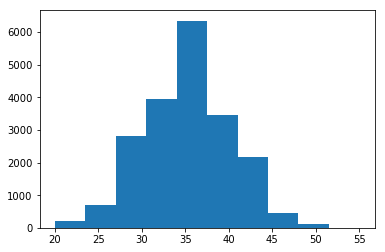

In [50]:
stats_describe(df['age'])

Qual é taxa de cliques (CTR) no botão da página inicial?

In [51]:
print("CTR: {:.2%}".format(df['start_click'].mean()))

CTR: 40.68%


Qual é a distribuição do tempo que as pessoas permanecem no site?

média:         8.81
desvio padrão: 3.12
mínimo:        0.00
25% percentil: 7.00
50% percentil: 9.00 (mediana)
75% percentil: 11.00
máximo:        22.00


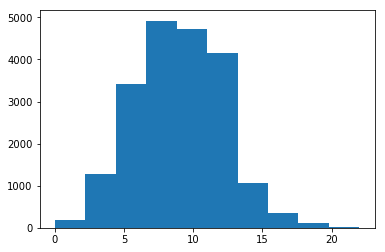

In [52]:
stats_describe(df['session_time'])

Será que há alguma correlação entre a pessoa clicar no botão "comprar" e o tempo que ela permanece no site? (Primeira hipótese surge naturalmente a partir dos dados)

Cliente clicou!
---------------
média:         9.98
desvio padrão: 3.16
mínimo:        1.00
25% percentil: 8.00
50% percentil: 10.00 (mediana)
75% percentil: 12.00
máximo:        22.00


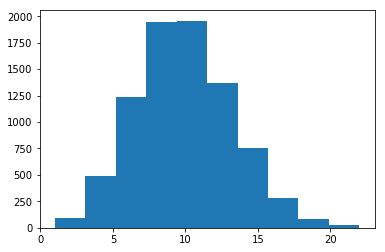

----------------------------------------
Cliente não clicou!
-------------------
média:         8.00
desvio padrão: 2.83
mínimo:        0.00
25% percentil: 6.00
50% percentil: 8.00 (mediana)
75% percentil: 10.00
máximo:        20.00


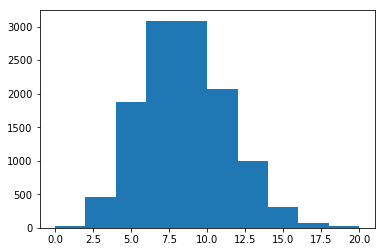

In [53]:
print("Cliente clicou!")
print("---------------")
stats_describe(df[df['start_click']==1]['session_time'])
print("-"*40)
print("Cliente não clicou!")
print("-------------------")
stats_describe(df[df['start_click']==0]['session_time'])

Qual é a taxa de conversão do nosso e-commerce? Essa é uma boa medida para indicar a saúde financeira do nosso site.

In [54]:
print("Taxa de conversão: {:.2%} (Homepage)".format(df['converted'].mean()))
print("Taxa de conversão: {:.2%} (Página produto)".format(df[df['start_click']==1]['converted'].mean()))

Taxa de conversão: 8.45% (Homepage)
Taxa de conversão: 20.77% (Página produto)


Qual é a distribuição do preço do frete?

média:         20.01
desvio padrão: 4.95
mínimo:        5.00
25% percentil: 17.00
50% percentil: 20.00 (mediana)
75% percentil: 23.00
máximo:        34.00


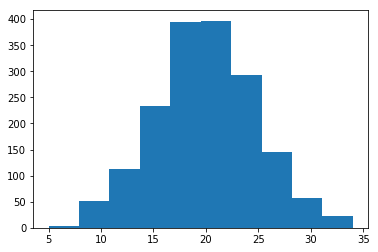

In [55]:
stats_describe(df[df['converted']==1]['shipping']) # Note que temos que considerar apenas os preços de produtos comprados

---
## Estatística inferencial: 
utiliza um conjunto de métodos estatísticos para inferir as características de uma população a partir de amostras finitas dela.

<img src="../imagens/populacao_amostra.png" alt="População x Amostra" style="width: 500px;"/>

### Exemplo:
Suponha que eu tenho um dado de 6 faces e gostaria de saber, em média, quantas vezes eu preciso jogar o dado para obter todas as faces. É possível resolver esse problema analiticamente utilizando o conceito de [distribuição geométrica](https://en.wikipedia.org/wiki/Geometric_distribution), mas gostaríamos de realizar amostragens empíricas. Quantas vezes você acha que é necessário?

Dado 1 vez: 4
------------------------------
Dado 10 vezes: [6, 1, 6, 1, 2, 4, 6, 4, 3, 4]
------------------------------
#Jogadas até todas as faces: 15, resultado: [3, 3, 1, 1, 6, 5, 6, 4, 3, 6, 4, 6, 4, 4, 2]
------------------------------
Distribuição do número de vezes que precisamos jogar o dado para obter as 6 faces:


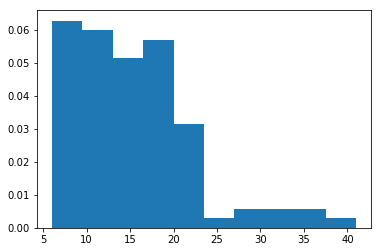

In [60]:
# Modulo que simula o jogo de dados
import exemplo_dado

# Jogar uma vez o dado:
print("Dado 1 vez: {}".format(exemplo_dado.throw_dice()))
print('-'*30)

# Jogar 10 vezes o dado:
print("Dado 10 vezes: {}".format([exemplo_dado.throw_dice() for i in range(10)])) # List comprehension
print('-'*30)

# Jogar dado n vezes até sair todas as faces
print("#Jogadas até todas as faces: {}, resultado: {}".format(*exemplo_dado.throw_until_all_faces()))
print('-'*30)

# Qual é a distribuição do número de vezes que precisamos jogar o dado para obter as 6 faces?
# Repetimos o experimento 100 vezes
print('Distribuição do número de vezes que precisamos jogar o dado para obter as 6 faces:')
hist_n_trials = exemplo_dado.get_n_trials_distribution(n=100)
plt.hist(hist_n_trials, normed=True)
plt.show()

Ok, mas qual é a média de vezes que precisamos jogar para obter todas as faces? A distribuição não parece nada "normal" (piada ruim, eu sei)

Vamos repetir a experiência anterior mais 10 vezes e veremos o que podemor obter.

(Obs: A distribuição encontrada está mais próxima de uma [distribuição geométrica](https://en.wikipedia.org/wiki/Geometric_distribution).)

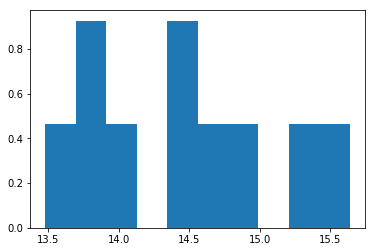

Média:         14.4590
Desvio Padrão: 0.6675


In [64]:
n = 10
def get_mean_trials_distribution(n):
    mean_trials = []
    for t in range(n):
        n_trials = exemplo_dado.get_n_trials_distribution()
        mean_trials.append(np.mean(n_trials))
    return mean_trials

mean_trials = get_mean_trials_distribution(n)
plt.hist(mean_trials, normed=True)
plt.show()
print('Média:         {:.4f}'.format(np.mean(mean_trials)))
print('Desvio Padrão: {:.4f}'.format(np.std(mean_trials)))

Nada normal... Talvez 100 vezes?

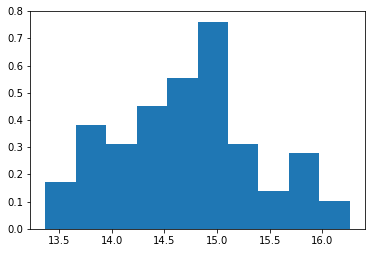

Média:         14.7187
Desvio Padrão: 0.6617


In [65]:
n = 100
mean_trials = get_mean_trials_distribution(n)
plt.hist(mean_trials, normed=True)
plt.show()
print('Média:         {:.4f}'.format(np.mean(mean_trials)))
print('Desvio Padrão: {:.4f}'.format(np.std(mean_trials)))

Um pouco melhor! E 10000?

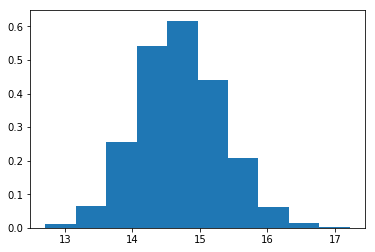

Média:         14.7047
Desvio Padrão: 0.6220


In [67]:
n = 10000
mean_trials = get_mean_trials_distribution(n)
plt.hist(mean_trials, normed=True)
plt.show()
print('Média:         {:.4f}'.format(np.mean(mean_trials)))
print('Desvio Padrão: {:.4f}'.format(np.std(mean_trials)))

De fato, a solução analítica do problema é exatamente 14,7. 

Note que quanto maior é o número de amostras tomadas, mais estreita é a curva e com mais aparência de uma curva normal ela se torna. Esse efeito é explicado pelo [teorema do limite central](https://pt.wikipedia.org/wiki/Teorema_central_do_limite), o qual demonstra que a distribuição das médias de um experimento aleatório se aproxima de uma curva normal para um número suficientemente grande de amostras. Note também que quanto mais amostras nós utilizamos, mais próximo o valor esperado (média das amostras) está da média real da população. Esse efeito é explicado pela [lei dos grandes números](https://pt.wikipedia.org/wiki/Lei_dos_grandes_n%C3%BAmeros), que é a base da teoria da probabilidade.

---
## Teste de Hipóteses

Em estatística, o teste de hipóteses é uma ferramenta poderosa para validar (ou invalidar) hipóteses sobre populações.

Normalmente, temos uma população de controle (ou uma hipótese prévia) e gostaríamos de saber se uma nova população obtida, ou uma nova amostra, é equivalente à população de controle. Ou seja, será que esse novo conjunto de dados possui alguma diferença em relação ao que tínhamos na população de controle? Esse teste é muito útil para verificar variações de tratamento de remédios, testes de novos métodos de produção na indústria ou mesmo em testes A/B!

Nessa aula, vamos focar em testes hipóteses entre proporções de populações diferentes. Esses testes serão úteis para executarmos nossa tarefa de testes A/B no nosso e-commerce TeraBuy!

O **teste de hipóteses** sempre começa com a definição das **hipóteses nula** ($H_0$) e **alternativa** ($H_1$). A hipótese nula normalmente é escolhida para definir que não há variação ($H_0: \mu_1 = \mu_2$) entre a população de controle ($P_1$) e a população de experimento ($P_2$). Essa definição de hipótese nula é chamada de "**bilateral**", porque qualquer variação positiva ou negativa fará com que a hipótese seja rejeitada, ou seja, escolhemos a hipótese alternativa ($H_1: \mu_1 \neq \mu_2$). Alternativamente, a hipótese nula "**unilateral**" considera apenas a variação positiva ou a negativa para o teste de hipóteses. Portanto, o teste de hipóteses vai avaliar se a população de experimento sofreu variação positiva (no caso do teste de variação positiva $H_0: \mu_1 \leq \mu_2$ | $H_1: \mu_1 > \mu_2$) ou negativa (no caso do teste de variação negativa $H_0: \mu_1 \geq \mu_2$ | $H_1: \mu_1 < \mu_2$)



O teste de hipóteses que vamos utilizar ao longo da aula será o teste "bilateral".

- $H_0: \mu_1 = \mu_2$
- $H_1: \mu_1 \neq \mu_2$

### Exemplo: 

Suponha que temos duas moedas ($P_1$ e $P_2$). A moeda $P_1$ é conhecida e sabemos que a probabilidade de sair "cara" é 50%, ou seja, é honesta. Precisamos agora definir se a moeda $P_2$ é honesta também. Com esse objetivo, nós realizamos 10 vezes o lançamento da moeda e contamos quantas vezes a "cara" apareceu.

O primeiro passo para o teste de hipóteses é definir a hipótese nula. Nesse caso, vamos definir $H_0$ como sendo a hipótese de que a moeda é honesta, ou seja, o número de "caras" em 10 lançamentos deve ser o mesmo do número de "coroas".

Vamos realizar um experimento considerando uma moeda honesta:

In [81]:
coin_outcomes = ['head', 'tail']

k = 10 # lancamentos

def get_n_heads(k=10):
    heads = 0
    for i in range(k):
        outcome = np.random.choice(coin_outcomes)
        if outcome == 'head':
            heads += 1
    return heads

print('Exemplo experimento: #caras = {}'.format(get_n_heads(k)))

Exemplo experimento: #caras = 3


Vamos repetir o experimento 100000 vezes e veremos qual é a distribuição de probabilidades de sair cada resultado

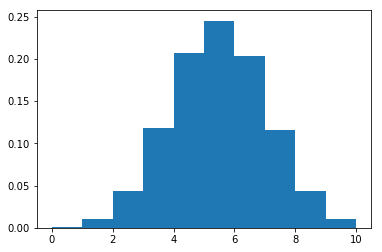

In [171]:
from collections import Counter 

n = 100000

count_heads = Counter()
results = []
for i in range(n):
    n_heads = get_n_heads(k=10)
    results.append(n_heads)
    count_heads.update([n_heads])

plt.hist(results, normed=True)
plt.show()

In [173]:
len(count_heads)

11

In [174]:
print('{:^10} | {:^10} | {:^10}'.format('caras', 'coroas', 'probabilidade'))
print('-'*40)
for i in range(len(count_heads)):
    print('{:^10} | {:^10} | {:^10.2%}'.format(i, 10-i, count_heads[i]/n))

  caras    |   coroas   | probabilidade
----------------------------------------
    0      |     10     |   0.10%   
    1      |     9      |   1.07%   
    2      |     8      |   4.38%   
    3      |     7      |   11.86%  
    4      |     6      |   20.74%  
    5      |     5      |   24.51%  
    6      |     4      |   20.37%  
    7      |     3      |   11.52%  
    8      |     2      |   4.38%   
    9      |     1      |   0.96%   
    10     |     0      |   0.10%   


Em um dado experimento com a moeda $P_2$, nós obtivemos 2 caras e 8 coroas. Esse resultado indica que o dado é viciado?

### Nível de significância

Devemos introduzir o conceito de nível de significância para responder essa pergunta. O **nível de significância** (representado por $\alpha$) é a probabilidade limite considerada para rejeitarmos a hipótese nula, considerando que ela fosse verdade. Ou seja, é a mínima probabilidade que vamos considerar válida para não considerarmos o nosso resultado simples "acaso". Essa probabilidade atua como uma linha de corte para a nossa confiança no teste. Normalmente, esse nível de significância é definido pelo analista do teste anteriormente e valores comuns são 5%, 1% ou 0.1%. O oposto do nível de significância é chamado de "**nível de confiança**" ($1-\alpha$).

Como estamos avaliando a hipótese bilateralmente, então vamos considerar a probabilidade para cada lado (variação positiva ou negativa) como sendo a metade do nível de significância. Assim, mantemos a região central com igual probabilidade.

Suponha que consideramos um nível de significância $\alpha$ = 8%, ou seja, consideramos que qualquer evento cuja probabilidade é menor do que 4% será considerado muito raro para ser obtido "puramente ao acaso".

A região de corte utilizando tal nível significância é mostrada a seguir:

In [175]:
print('{:^10} | {:^10} | {:^10}'.format('caras', 'coroas', 'probabilidade'))
print('-'*40)
for i in range(len(count_heads)):
    if (i == 2) or (i == 9):
        print('*'*40)
    print('{:^10} | {:^10} | {:^10.2%}'.format(i, 10-i, count_heads[i]/n))

  caras    |   coroas   | probabilidade
----------------------------------------
    0      |     10     |   0.10%   
    1      |     9      |   1.07%   
****************************************
    2      |     8      |   4.38%   
    3      |     7      |   11.86%  
    4      |     6      |   20.74%  
    5      |     5      |   24.51%  
    6      |     4      |   20.37%  
    7      |     3      |   11.52%  
    8      |     2      |   4.38%   
****************************************
    9      |     1      |   0.96%   
    10     |     0      |   0.10%   


Portanto, qualquer resultado de um evento que estiver dentro dessa região é considerado válido e dizemos que "não temos evidência para rejeitar a hipótese nula". Ou seja, o evento não é tão raro assim para considerarmos algo "muito diferente" do que a hipótese nula definia.

Isso quer dizer que a hipótese nula é verdadeira?
- **Não!** Quer dizer que não temos evidência para dizer o contrário. Podemos ter mais confiança se realizarmos o ensaio repetidas vezes.

### Intervalo de confiança

O *intervalo de confiança* nada mais é do que o intervalo de valores dos resultados obtidos utilizando um dado nível de confiança. Ao utilizarmos um nível de significância $\alpha$ = 8%, temos um nível de confiança de 92%, e, portanto, o intervalo de confiança contém os resultados com maior probabilidade.

Para o exemplo das moedas, o intervalo de confiança para a quantidade de caras, utilizando um $\alpha$ = 5%, seria: I.C. = [2, 8]. Qualquer valor obtido fora desse intervalo nos permitiria rejeitar a hipótese nula.

### p-valor

O **p-valor** (do inglês, *p-value*) é um dos assuntos mais [controversos da estatística](https://en.wikipedia.org/wiki/P-value#Controversy), principalmente por seu uso equivocado na maioria dos casos. Por definição, o p-valor é a probabilidade de obter um resultado estatístico pelo *menos tão **extremo*** quanto o que foi observado, *assumindo que a hipótese nula é **verdadeira***. Ou seja, no caso das moedas, a probabilidade de obtermos apenas 1 "cara" em 10 jogadas é de, aproximadamente, 1%. Portanto, considerando que a hipótese nula é verdadeira, o p-valor desse resultado seria igual a 1%.

O p-valor($p$) pode ser utilizado para rejeitar ou manter a hipótese nula. Define-se, em geral, que um resultado é estatisticamente significativo (ou seja, rejeita-se a hipótese nula) se o p-valor for menor do que o nível de significância dividido pelo **número de direções** do teste (teste unilateral: d=1, ou bilateral: d=2), ou seja
$$p < \frac{\alpha}{d}$$

### Tipos de erro

Ao realizarmos um teste de hipóteses, nós podemos cair em 4 cenários distintos:

- **Aceitamos** a hipótese nula e ela era, de fato, **verdadeira** (OK!)
- **Rejeitamos** a hipótese nula, mas ela era **verdadeira** (Erro tipo 1: Falso positivo)
- **Aceitamos** a hipótese nula, mas ela era **falsa** (Erro tipo 2: Falso negativo)
- **Rejeitamos** a hipótese nula e ela era, de fato, **falsa** (OK!)

A taxa de **erro tipo 1** é definida pelo nível de significância $\alpha$, ou seja, a proporção de vezes que detectamos uma variação, mas, na realidade, não houve.

A taxa de **erro tipo 2** é representada pela letra $\beta$. Já o seu oposto, $1-\beta$, representa o que chamamos de "poder do teste" (statistical power) e indica a porcentagem das vezes que vamos detectar uma variação, caso ela exista.

### Tamanho da amostra

O tamanho da amostra é a quantidade de dados utilizados na nossa amostra. Esse parâmetro está diretamente ligado ao **poder do teste**. Intuitivamente, é fácil notar que quanto mais dados utilizamos para realizar um teste de hipóteses, mais facilmente vamos notar uma variação, caso ela exista. Também podemos dizer que o teste se torna mais "sensível" a medida que utilizamos mais dados. 

Mas, se esse parâmetro é tão importante, por que não utilizamos valores altos?
- O problema é o alto custo de gerar dados. "Data is money" é uma expressão famosa e muito real nesse caso. Gerar dados leva muito tempo e pode ser muito caro. As vezes precisamos tirar conclusões com menos dados do que gostaríamos. E é exatamente por isso que precisamos aprender a **quantificar a nossa incerteza**.

### Significância prática / Efeito mínimo

Ao modelar um teste de hipóteses (como um teste A/B), precisamos entender nossas limitações de tempo e custo para poder definir o que esperamos encontrar no resultado. Por exemplo, vale a pena criarmos um teste de hipóteses com baixíssimas taxas de erro tipo 1 e 2, mas levarmos anos para conseguir todos os dados necessários? Algumas poucas vezes a resposta é "sim". Mas, na maioria das vezes, nós não precisamos de tanto poder estatístico (poder do teste) ou um nível de significância tão alto. As vezes, só importa para nós sermos capazes de observar uma variação significativa - pode ser 30% no caso de um teste de remédios, ou 2% no caso de trafego na Google - e qualquer coisa abaixo disso não nos interessa. Essa mínima variação observada pelo teste está diretamente relacionada com o poder do teste ($1-\beta$) e é chamado de **significância prática** ou **efeito mínimo** (em inglês, normalmente se adota o termo *effect size*).

Ao todo, temos 5 parâmetros que precisamos definir antes de realizarmos o teste de hipóteses:
- nível de significância ($\alpha$)
- poder do teste ($1-\beta$)
- tamanho da amostra (N)
- efeito mínimo ($e$)
- número de direções do teste ($d$)

Na prática, apenas 4 desses parâmetros são definidos e o último é calculado a partir dos outros. Normalmente, o parâmetro calculado é o tamanho da amostra.

Existem calculadoras online que nos permitem obter o tamanho da amostra dados os parâmetros. Esse [link](http://www.evanmiller.org/ab-testing/sample-size.html) é um site comumente utilizado.

---
# Case: Teste A/B

Todo teste A/B deve começar com um entendimento claro do problema que devemos atacar. Precisamos entender qual o objetivo que queremos atingir e que métricas vamos utilizar para verificar o sucesso.

Suponha o seguinte cenário para esse exercício: 
- Ao analisar os dados do TeraBuy, notamos que recebemos um bom tráfego de pessoas na nossa homepage, mas temos uma baixa taxa de pessoas que clicam (CTR: "click-through rate") no botão "compre já!" e, consequentemente, temos uma baixa taxa de conversão (proporção das pessoas que finalizam a compra). Ao levantar as possíveis hipóteses para esse fenômeno, a equipe de front-end sugeriu mudar a cor do botão (afinal, verde não é bonito). Mas, como cético que você é, você cria a sua hipótese inicial: "Será que a mudança da cor do botão mudaria o comportamento dos usuários?". Vamos realizar um teste A/B! (finalmente!)

Página do experimento:
![TeraBuy](../imagens/terabuy_experimento.png)

Agora podemos definir claramente nossos objetivos e métricas:

- **Objetivo**: Verificar variação na taxa de cliques do botão "compre já" na homepage do TeraBuy a partir da mudança de cor do mesmo.

- **Métricas**: Taxa de cliques no botão (CTR)
(Pergunta: Por que não utilizar a taxa de conversão como métrica?)

Detalhes técnicos (ir)relevantes: Cada usuário que entra no site recebe um identificador único, que é chamado de "cookie", e está associado ao seu ip. Dessa forma, podemos acompanhar o comportamento do cliente no site durante sua sessão. Quando realizamos um teste A/B, nós associamos aleatoriamente um dado cookie a um determinado "bucket" ("A" ou "B"). O cookie associado ao bucket "A" não perceberá qualquer variação no site, enquanto que o cookie associado ao bucket "B" visualizará o conteúdo de teste. Todos os cookies associados ao bucket "A" entram no que chamamos de "grupo de controle", enquanto que os outros estarão no "grupo de experimento".

#### Geração de dados do teste

A classe `ColorABTest` contém o dataframe com os dados do teste A/B realizado. Diferentemente do dataframe utilizado anteriormente, esse dataframe contém uma coluna chamada "bucket", que indica se o usuário viu ou não a nova funcionalidade. Ou seja, se bucket=1, o usuário viu o botão vermelho.

In [178]:
import gen_ab_test_data

# Gera um objeto da classe do teste A/B de cores do botão "compre já"
teste_ab = gen_ab_test_data.ColorABTest()

# Para acessar o dataframe do teste, acesse o atributo "df"
teste_ab.df.head(10)

,bucket,age,start_click,session_time,converted,ticket_price,shipping
0,0.0,30.0,1,10,0,0.0,0
1,0.0,35.0,0,6,0,0.0,0
2,1.0,33.0,0,5,0,0.0,0
3,0.0,39.0,0,2,0,0.0,0
4,0.0,35.0,0,9,0,0.0,0
5,1.0,39.0,1,12,0,0.0,0
6,1.0,27.0,0,5,0,0.0,0
7,1.0,31.0,0,13,0,0.0,0
8,0.0,39.0,0,8,0,0.0,0
9,1.0,30.0,1,10,0,0.0,0


In [181]:
# Para encontrar o valor médio de uma coluna para um determinado valor de bucket, você pode utilizar o método "mean_bucket"
print("Média: ",teste_ab.mean_bucket(bucket=1, field='age'))

# O mesmo se aplica para o desvio padrão com o método "std_bucket"
print("Desvio padrão: ",teste_ab.std_bucket(bucket=1, field='age'))

Média:  35.03261395528888
Desvio padrão:  4.975919647198095


In [ ]:
## TODO: Obter a taxa de CTR para o bucket 0 e 1
ctr_0 = 
ctr_1 = 

In [ ]:
## TODO: Obter a taxa de conversão para o bucket 0 e 1
conv_rate_0 = 
conv_rate_1 = 

#### Teste de hipóteses

O objetivo do teste A/B é o de medir a variação entre duas proporções de sucesso entre duas populações diferentes (bucket "A": $p_A$ e bucket "B": $p_B$). Definiremos a hipótese nula indicando que os dois buckets são idênticos. Alternativamente, a hipótese alternativa indica uma variação significativa entre as proporções dos buckets.

$$H0: p_B - p_A = 0$$
$$H1: p_B - p_A \neq 0$$

Simplificações:
- assumiremos que cada evento associado ao sucesso ou não do clique é independente dos demais.
- assumiremos que as duas proporções possuem variância semelhante.
- modelaremos a proporção de cliques como uma distribuição binomial

A partir dessas simplificações, podemos iniciar os cálculos para nosso teste!

Primeiramente, vamos definir os parâmetros do teste de hipóteses e depois vamos calcular o número de dados que serão necessários.

Parâmetros escolhidos:
- $\alpha$ = 5%
- $1-\beta$ = 80%
- efeito mínimo ($e$) = 2% (significância prática) -> Não aceitaremos uma variação menor do que 2%
- número de direções ($d$) = 2

calculadora de tamanho de amostra: [link](http://www.evanmiller.org/ab-testing/sample-size.html)

Para esse teste, utilizaremos o teste Z agrupado para diferentes populações ([link](https://www.youtube.com/watch?v=hWYWHuH_zIw)). Esse teste é útil quando queremos medir variações entre proporções de sucesso entre amostras semelhantes (mesma variância).

Supondo que as duas populações possuem mesma proporção (hipótese nula), podemos calcular a **proporção agrupada** por:
$$\overline{p} = \frac{s_A + s_B}{N_A + N_B}$$
onde $s_X$ indica o número de sucessos do bucket X e $N_X$ é o numero total de usuários no bucket X. A proporção de sucesso de um bucket qualquer é calculado por: 
$$\hat{p}_X = \frac{s_X}{N_X}$$
(Note que o símbolo ^ indica que a proporção foi calculada empiricamente, ou seja, é apenas uma estimativa da proporção real da população)

O desvio padrão pode ser estimado utilizando a mesma hipótese de mesma proporção, onde obtém-se o **desvio padrão agrupado**:
$${se}(\hat{p}_B - \hat{p}_A) = \sqrt{\overline{p} (1-\overline{p}) (\frac{1}{N_A} + \frac{1}{N_B})}$$

Agora podemos calcular o "z-score" do teste, considerando que temos um tamanho de amostra suficientemente grande para aproximarmos a distribuição por uma normal.
$$Z = \frac{\hat{p}_B - \hat{p}_A}{{se}(\hat{p}_B - \hat{p}_A)}$$

Podemos também calcular o "z-score" para o nível de significância $\alpha$. Como utilizamos o teste bilateral, utilizaremos, na verdade, o z-score de $\frac{\alpha}{2}$. Esse valor pode ser calculado a partir de um software ou por uma tabela ([link](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf)) (Por exemplo, para um $\frac{\alpha}{2}$=0.025, temos um z-score de 1.96)

Finalmente, o intervalo de confiança do nosso teste será:
$${I.C.} = \hat{p}_B - \hat{p}_A \pm Z_\frac{\alpha}{2} {se}(\hat{p}_B - \hat{p}_A)$$

In [202]:
# parametros teste A/B
alpha = 0.05
directions = 2

s_A = len(teste_ab.df[(teste_ab.df['bucket']==0) & (teste_ab.df['start_click']==1)])
N_A = len(teste_ab.df[teste_ab.df['bucket']==0])

s_B = len(teste_ab.df[(teste_ab.df['bucket']==1) & (teste_ab.df['start_click']==1)])
N_B = len(teste_ab.df[teste_ab.df['bucket']==1])
effect_size = 0.02

In [ ]:
## TODO: calcule a proporção agrupada do teste A/B
p_pool = 
print('Probabilidade agrupada: {:.2}'.format(p_pool))

# calcule o desvio padrão agrupado
se_pool = 
print('Erro padrão agrupado: {:.2}'.format(se_pool))

# calcule o z-score do teste
z_test = 
print('Z-score (teste) = {:.2}'.format(z_test)

In [211]:
# Calcular z_alpha/2
z_alpha2 = st.norm.ppf(1-alpha/2)
print('Z-score (alpha/2) = {:.2}'.format(z_alpha2))

In [ ]:
# TODO: calcule o intervalo de confiança
ic_min = 
ic_max = 

ic = [ic_min, ic_max]
print('Intervalo de confiança: {} - {}'.format(ic_min, ic_max))

In [ ]:
# TODO: calcule o p-valor do resultado
# HINT: Inversa da st.norm.ppf(x) -> st.norm.cdf(x)  (Probabilidade do valor da cauda dado por x)
p_value = 
print('P-valor = {:.2}'.format(p_value))

In [ ]:
# veredito:
if p_value < alpha/directions:
    print('Teste estatisticamente significativo! =)')
    if ic_min > effect_size:
        print('Teste significativo na prática! =)))')
    else:
        print('Efeito mínimo não alcançado. O que fazer? =|')
else:
    print('Teste não é estatisticamente significativo! =(')

In [ ]:
## TODO: refazer análise para taxa de conversão
# Que conclusões tiramos?